# <center>**Course Project 2** </center>

**Policy**

1. You may use your own or any software packages/module/codes to do this project. 
2. The project has to be done in groups of 2-4 persons each working together to complete all the tasks. The team can be the same as the Project 1 or re-formed.  
4. The report should be no more than 20 pages, including one page describing the contributions of each of the members in the group, figures, tables and codes. 
5. You are encouraged to do beyond the described tasks along with the central topic. Quality and innovative work will be greatly rewarded. 


Consider a penetration of a bullet onto a plate, as shown in the following figure. 

<div>
<br>
<img src="../../../images/Penetration.png" width="300"/>
<br>
[A bullet penetrated a circular plate]
</div>

Study the paper entitle "Real-time prediction of projectile penetration to laminates by training machine learning models with finite element solver as the trainer" given in the file holder of the course website. The dataset for this study was generated from a large number of FEM analyses for a real research project, and it is given also in the file folder. The Python code for the neural network is given there as Neural_network_FEA.py. Note that this neural network model is for predicting the entire time history of the velocity of the bullet, before and after the penetration. Before doing your tasks before, you should try to repeat the work on NN first using exactly the same dataset and codes.  

1. Establish a new NN model to predict only the residual velocity of the bullet, using the given dataset, aiming to outperform the one in the paper. Note that for the penetrated cases, the residual velocity will still be positive. For the not-penetrated cases, it is negative because the bullet is bounced back. 

2. Establish any other alternative model to repeat Task 1. 

3. Discuss on what type of ML model work best for this type of data.

You may use any existing 3rd party ML module or your own code to get this tasks done. 

Please submit both codes and reports online by the deadline. No extension will be given, because this is the final project. 

11/11 [==============================] - 0s 3ms/step


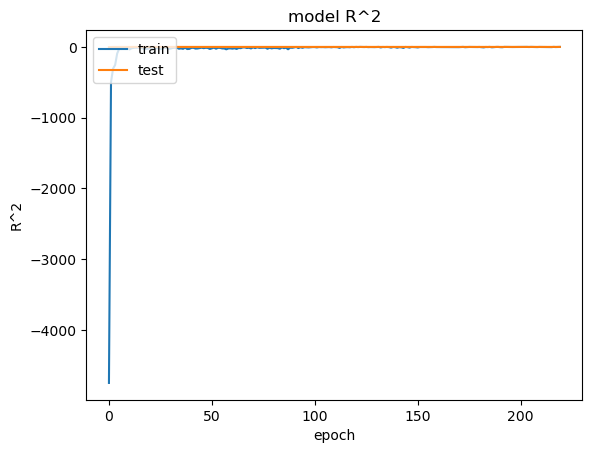

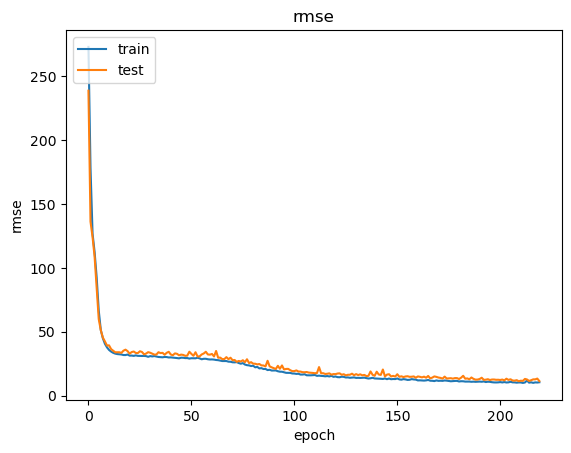

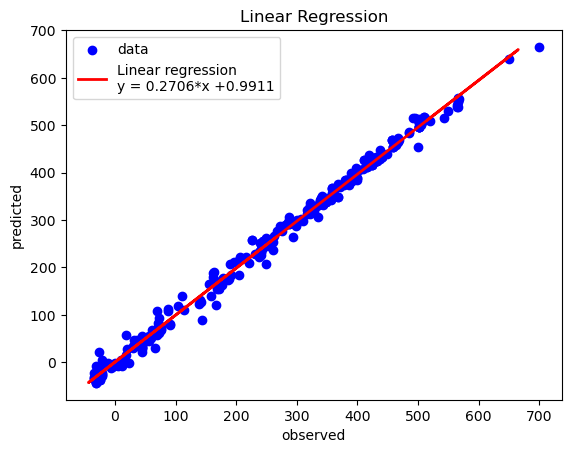

11/11 [==============================] - 0s 2ms/step - loss: 165.2122 - mean_squared_error: 165.2122 - rmse: 9.4944 - r_square: 0.9940
R_squared value:  0.9911
RMSE:  12.853488172598324
Computation Time: 64.62722897529602 s


In [45]:
# Thesis code Neural Network- Finite Element Dataset
# Author- Pushkar Wadagbalkar
# ************************************************************************************

# importing all the required python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression  
from keras.models import Sequential
from keras.layers import Dense
import seaborn as sns
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import time

# root mean squared error (rmse) for regression (only for Keras tensors)
def rmse(y_true, y_pred):
    from keras import backend
    return backend.sqrt(backend.mean(backend.square(y_pred - y_true), axis=-1))

# coefficient of determination (R^2) for regression  (only for Keras tensors)
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

# importing training dataset and target files
dataset = pd.read_csv('./Finite_element_entire_data_set.csv')
X = dataset.iloc[:, :].values
Y = dataset.iloc[:, 5].values
X = np.delete(X, 5, 1)

# Column Transfer and one hot encoding for categorical features
ct = ColumnTransformer(
    transformers=[("oh", OneHotEncoder(), [2, 3, 4])], remainder="passthrough")
X = ct.fit_transform(X)
X = np.asarray(X).astype('float32')
# fig, (ob1, ob2) = plt.subplots(ncols=2, figsize=(10, 10))
# ob1.set_title('Before Scaling')
# sns.kdeplot(dataset['Time'], ax=ob1)
# sns.kdeplot(dataset['Velocity'], ax=ob1)
# Feature scaling using MinMaxScaler
sc = preprocessing.MinMaxScaler(feature_range=(0, 1))
X[:, [10, 11]] = sc.fit_transform((X[:, [10, 11]]))
Z = pd.DataFrame(X)
# Plotting the KDE plot for data after feature scaling
scaled = Z.iloc[:, :]
# ob2.set_title('After Scaling')
# sns.kdeplot(scaled[10], ax=ob2)
# sns.kdeplot(scaled[11], ax=ob2)
# Splitting the training data from the unseen inputs for which predictions are to be made
Train = Z.iloc[0:3221]
Input = Z.iloc[3221::]

# Splitting the data into training, validation and testing datasets
train_x, test_x, train_y, test_y = train_test_split(
    Train, Y, test_size=0.20, random_state=0)
validation_x, testing_x, validation_y, testing_y = train_test_split(
    test_x, test_y, test_size=0.50, random_state=0)

# importing and implementing Neural network regression model
model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(12,)))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1,))
model.compile(optimizer="adam", loss="mse", metrics=["mean_squared_error", rmse, r_square])
# Compiling the model with early stopping algorithm
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3,
                        patience=10, verbose=0, mode='auto')

start = time.time() # Check start time

# Computing training and validation loss for the network
history = model.fit(train_x, train_y, validation_data=(
    validation_x, validation_y), callbacks=[monitor], verbose=0, epochs=1000)
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

# Getting predictions for training dataset
y_train_pred = model.predict(train_x)
# Getting predictions for validation dataset
y_validation_pred = model.predict(validation_x)
# Getting predictions for testing dataset
final_result = model.predict(testing_x)
# Getting predictions for unseen inputs
# Unseen_result = model.predict(Input)
# Calculating relative error for validation dataset

end = time.time()# Get end time
totalt = end - start # Get elapsed time

Error = ((validation_y-y_validation_pred)/validation_y)


def average(Error):
    return sum(abs(Error))/len(Error)


Relative_Error = average(Error)
# Calculating relative error for testing dataset
Error_testing = ((testing_y-final_result)/testing_y)


def average(Error_testing):
    return sum(abs(Error_testing))/len(Error_testing)



Testing_Relative_Error = average(Error_testing)

# Calculate accuracy and error metrics 

# plot training curve for R^2 (beware of scale, starts very low negative)
plt.plot(history_dict['val_r_square'])
plt.plot(history_dict['r_square'])
plt.title('model R^2')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
           
# plot training curve for rmse
plt.plot(history_dict['rmse'])
plt.plot(history_dict['val_rmse'])
plt.title('rmse')
plt.ylabel('rmse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(testing_y.reshape(-1,1), final_result)  
y_fit = regressor.predict(final_result) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(testing_y, final_result, color='blue', label= 'data')
plt.plot(final_result, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

score = model.evaluate(testing_x, testing_y)
print('R_squared value: ', reg_coef)
print('RMSE: ', np.sqrt(score[0]))
print('Computation Time:',totalt,'s')

1) Neural Network Solution

In [73]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
import pandas as pd
import time

# Open file utilizing pandas module for data frames
df = pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Preform OHE
onehot = pd.get_dummies(df, drop_first=True)
X = onehot.to_numpy()
Y = onehot.iloc[:, 3].values
X = np.delete(X, 3, 1)


# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0)
y_train = y_train.astype('int')
start = time.time() # Check start time 

#X_train = X_train.reshape(-1, 1)
#X_test = X_test.reshape(-1, 1)
#y_train = y_train.reshape(-1,1)

# Train Data
clf = MLPRegressor(
    activation='tanh',
    solver='adam',
    hidden_layer_sizes=(100, 100),
    alpha=0.001,
    random_state=0,
    early_stopping=False,
    max_iter=10000
).fit(X_train, y_train)

# Predictions and testing/training
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

end = time.time()# Get end time
totalt = end - start # Get elapsed time

# Calculate accuracy and error metrics
test_set_rsquared = clf.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(y_test.reshape(-1,1), y_test_pred)  
y_fit = regressor.predict(y_test_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_test_pred, color='blue', label= 'data')
plt.plot(y_test_pred, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()

print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
print('Computation Time:',totalt,'s')


ValueError: Expected 2D array, got 1D array instead:
array=[270.09570981 347.41951572 198.4145309  319.34568785 516.16629307
 196.8823567  284.62837249 513.96081891 460.69954635 514.84920565
 366.90050162 169.66892574 428.6065017  130.39149232 221.91812098
 148.32354708 321.29195525 372.89110514 389.35183099 493.81766973
  76.33812549 269.06366628  31.10415841 106.80292455  51.8942006
 514.8880645  517.45663071 133.75500416 269.40866907  -1.08772861
 210.6424877    6.66150783 265.84099294 508.36069173 445.49144751
 -14.35508188 324.11644597 178.35243671 472.92850299 -14.26847063
  91.27154665 211.96201817  89.95144452 370.60693922 506.04819624
 364.78074982 432.30082014 322.30511613 504.46162452   9.98661562
  29.43244785  -3.05466406 320.64295074 171.33987423 258.77676422
  19.07854192 506.58828393 459.91948777 320.45106704 516.20508945
 464.30658837 515.94669857  29.44181997 505.19116669  20.01531412
 265.62013593  31.62563206   7.561429   391.29395434 269.17267265
 428.53772689  99.8268008  413.3237635   18.94132743 418.74001603
 365.84160966  86.38323705 473.32782426  96.75589757 364.08342424
  14.32785449  -2.9408736   10.06970169 363.96282158  14.07386745
 514.87702167   7.76398185  -1.64576998 385.0823647  202.60277684
  87.97200941 291.60456833 459.74047415 363.23840559 413.50435695
 203.17211119 320.73122375 463.39852266 470.62946733 345.79517182
  13.03836374 201.67206844  32.5615917  458.79216179 343.71142089
 490.46317496 514.68636471 434.55318634   7.14694052 202.30839912
 326.31913978 293.30791226 292.69021483  94.9850882  365.99300656
  52.80213254 389.65924858  56.2077514  343.94266311 514.42761962
 516.14867836 516.83202927  55.66504037 465.0440734  321.47902575
 133.38272904 433.92855034 515.22173133 513.84592821 373.15051668
 -14.31173959  13.35070692  54.06928859 266.94762164 200.36222621
 108.93299131  -1.29023313 516.27005159  31.49489701 432.60847623
 369.24143747 411.40181442 322.5689929  179.22252684 340.23898589
  95.70083012 516.20622256 417.27512423 488.20083309  -3.03421231
  18.15391864 170.27945357 434.07761807 419.77294558 321.8686509
 187.88697128 516.00101846 516.66234336   7.49434055 460.27726089
 515.96862819  15.20060958 516.22581016 395.86464763 211.95848126
 210.45454079  44.83009541  20.32727912 364.20402321  44.55700468
 369.14380886 492.67121419 202.96421281 499.31247557  51.02468287
  88.12026635 431.98077313 464.24041609  44.91053049 374.220015
 362.39159006 212.56213831 516.02755655   8.73497375  53.01858158
 366.44696666 375.90448579 499.63823312  -6.48414344 389.50564736
 516.01168262 490.59961379 377.1136958    7.01960293 379.14718572
 516.24482466 341.30793271 208.81980635 514.88384389 418.95844467
 188.19919252 362.14927144 198.7186041  321.01149087  83.94506178
 384.56722979 473.02842351 392.08162881 376.05682148 321.66614683
  -3.59167131 488.63643179 397.3916754   -3.3839682  514.16199495
 396.23103228 169.97465476 233.42434258  83.82589124 284.48290997
 420.10041213 390.41057082  21.85972996 381.21113615 397.26594728
  95.00522487 220.07788131  52.30756097 362.63374062 493.21641473
 363.87019213  84.9028933  413.41402745 504.62705529 370.70437958
 504.12498087  -2.9502276  489.49180564   7.76400107 322.91205665
 465.64694666 368.82292028 398.3016979  513.87006593 504.29427015
 428.33178178 419.44647954  52.94611711 201.32205033 489.0667535
 275.96105899   7.08717613  92.41345175 291.91539538  51.27083392
 516.21015993 101.85532225 516.01699024  -5.47393857 511.88200025
 426.58013628 423.52465383 378.95906628 255.4999254   84.54272916
  99.62336097 375.98065545  32.77383873 397.38116053  30.33790638
  51.76748127  -2.86455626 234.31048583  22.30226116 428.19482365
 515.23758822 378.01718893 291.44896078 376.51306329 389.96561464
 171.64116583 321.38158103 169.8218824  427.04082067 101.81250374
  31.36335562  18.03976447  88.2656786    8.45327658  14.49442562
 103.03560816   8.31370165  15.66548742 373.97173676 235.41844266
 274.39497906 215.45354404 256.7216999  517.46569812  -2.53546019
  52.23803    202.70728139 459.62380067 266.39157973 457.11586769
 516.23104616 459.69933357  55.12771059 276.51228199 232.981452
 154.63290446 336.24913028 516.16224379 460.99129435 517.46269463
 515.85869204 340.77286977  91.72627717 516.6775882   13.75092162
 336.07547861 508.26934516 102.25984577 197.49757257 417.01163937
  78.65875978  95.46156682  -1.26180535 415.17086602 515.9794917
 200.62556374 209.70406465 418.05695318  44.25991535 202.64717912
 274.73351165  -8.24868473  29.50819552 202.11934463  -5.53034422
 183.46014627 267.61362744 516.28534695 378.33227157  53.54833
  99.82685504  44.99210228 129.26351405 211.58434821  -5.54273274
 514.34636996 317.89536371 291.91539797 319.46663564 156.46541145
 445.60329217 444.37528803  -2.80649333 325.94445113 276.61351864
 201.45542314 171.9418026   32.42624879 213.31911358 514.76637078
 267.32378458 413.14338154 321.19846231 375.14020932 292.84480853
 515.31541088 343.19730319 517.47164862 290.98129528  15.71178387
 472.32769308 170.43154774  31.17685965 321.49511163  14.35354953
 100.84237922 508.57050828 374.26562965  95.50646058 416.53843784
  82.62576768 430.96633645 378.30480153 373.4811136  422.62730547
 233.42436472 339.52908653 419.56037989  17.69928908  52.52255504
 456.69452262 505.8801969  235.41840572 102.05763267  19.31290308
 267.67378931  98.55245    278.56002668 470.71993231 513.98336424
 346.72304477 188.66527586 214.80589147  10.36507086 202.19110586
 372.595595    -2.6276212  514.94795845  88.55704295 466.73067217
 325.8132052  516.80280449 506.84012372  -3.50430458 514.83309612
 459.9258785   -3.51903251 473.62663698  52.51780016 200.22742858
  94.0404211  273.57532798 463.23665554 -14.40938509 321.02375586
 231.65393546 328.44804415  88.70287941 201.12368061 416.02061388
 516.68512745 516.82560677 272.74889586  19.24792858 515.93007273
 320.07781765   6.72749436 457.78981883 208.99393807 516.07415509
 140.11335925 444.15257652 462.63508477 514.03234823  21.74413872
  13.84284229 292.17191341 514.73237148 422.833776   235.19687435
  18.49372475 373.62854819 267.24127696 514.0977497   97.11425916
 188.97460345 427.51391126 272.54122402 170.73511827   9.82211088
 199.39217293 369.53424283 108.57444281 505.98129627 292.84480338
 322.17253688  18.498215    21.97744222 101.44862779 187.41676983
 513.89087991 323.85992685 279.26995471 513.81074925  21.76689654
 276.12510327 264.26653427 412.15506271 233.64588151 338.46835814
 514.94257192  -5.50540845  -1.37459355 419.28357639  -2.97839902
 272.97786299 508.54081578 292.22569393 373.63701358 368.48796461
 100.35938394 517.09544883 460.07686732  22.43977938  32.47478874
 321.47350296 101.45045756  93.84404824 456.10459333 513.83423636
 283.61018788  30.48645175 319.22463232 516.68324794  22.75558241
 466.5175246   23.07301167 279.62265383  -1.51209716  98.91303561
 169.82187476 290.66881821 428.2632778    7.36084453 267.770239
 514.36978275 268.19689741 324.72482959   6.89074736 362.27044463
  14.12029452  84.33267813   9.78132937 493.35113953 272.95612868
 140.28443607 410.79143647  31.62621772   8.17497554 268.54436307
 460.15233352 148.17161129 391.02985242 512.19605651 427.58173782
 131.14146644  15.38698143 293.46204239 338.82136202 504.2098685
  14.52726379 515.25334679 338.64480261 433.07819471  21.4419399
 262.20983306  -5.48026078 275.98189541 363.60077314   6.73437572
 210.0511374  370.89922298 374.06974019  -2.56638696 508.23870287
 289.8129439   97.47311751   8.38336566 391.20600186 513.89232134
 516.14346123 370.11954438  97.83254083 461.16955684 369.72939143
  -8.33005541 344.63675754 343.27798405 379.33524128  -1.45756364
  31.65759811 380.46177206 274.43207817 365.23559856 269.58078605
 516.09039628 338.11591057 516.10648781 267.6645016  320.37798075
 327.35071122  -2.8838736  456.18886562 426.46533579 396.96401704
 459.4726781  419.03961157 181.36500993 389.1977326  368.15292486
 276.57559206  78.19856712 263.44811868 148.77825076 502.12976297
 213.98452294 514.77760848 516.22969786 276.8642852  513.86919638
 385.01793221  -6.41885865 157.48875493 103.37048074  33.99067059
 370.31455131 201.87338839 516.68887674 107.50716347 459.24593677
 326.47024858  95.84179974 319.25710246 415.02932163 433.36095307
 221.0013408   81.35365965  -2.74765585  30.21217268 319.84922125
 320.43813558  31.3212942  205.24602091  86.98970607 506.92276696
  55.39564061  94.00914195 189.8964708  514.69793892 321.68180552
 293.64876738  93.51465701 213.164739   258.15773548 324.70282489
 139.09075465 258.3638038  419.12090489 320.0720851  459.32151932].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

2) Alt-Model (SVM Regression)

In [56]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# Open file utilizing pandas module for data frames
df = pd.read_csv('./Finite_element_entire_data_set.csv', sep=',')

# Preform OHE
onehot = pd.get_dummies(df, drop_first=True)
X = onehot.to_numpy()
y = onehot.iloc[:, 3].values
X = np.delete(X, 3, 1)


# Split the dataset into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
regressor = SVR(kernel='rbf')

start = time.time() # Check start time 

regressor.fit(X_train, y_train)

y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

end = time.time()# Get end time
totalt = end - start # Get elapsed time

# Calculate accuracy and error metrics
test_set_rsquared = regressor.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# print the linear regression and display datapoints
regressor = LinearRegression()  
regressor.fit(y_test, y_test_pred)  
y_fit = regressor.predict(y_test_pred) 

reg_intercept = round(regressor.intercept_[0],4)
reg_coef = round(regressor.coef_.flatten()[0],4)
reg_label = "y = " + str(reg_intercept) + "*x +" + str(reg_coef)

plt.scatter(y_test, y_test_pred, color='blue', label= 'data')
plt.plot(y_test_pred, y_fit, color='red', linewidth=2, label = 'Linear regression\n'+reg_label) 
plt.title('Linear Regression')
plt.legend()
plt.xlabel('observed')
plt.ylabel('predicted')
plt.show()
print('R_squared value: ', test_set_rsquared)
print('RMSE: ', test_set_rmse)
print('Computation Time:',totalt,'s')

ValueError: Expected 2D array, got 1D array instead:
array=[251.79034503 251.62510559 198.01662463 251.79457204 464.45341401
 198.01662463 251.29130614 436.7041491  436.70186573 464.378035
 355.24740297 147.70082219 398.89974491 102.16691448 198.01698713
 147.70098466 305.04474172 355.24717682 355.24692826 399.81308785
 147.4924196  251.79034502  65.04093531 147.41425186 102.16307244
 464.378035   482.37179379 102.16691448 251.79034503  36.95586177
 198.36682251  36.84205126 198.02109259 463.29278149 355.19854366
  12.28249811 304.93605889 147.49259203 435.64839213  12.28249811
 147.70119563 198.36682251 102.16274181 355.19540799 464.37459927
 355.24740297 399.81106947 305.04487504 463.29258583  36.43033023
  64.63460186  36.43381669 305.04487504 147.70082219 198.01688624
  64.63793247 436.70525973 436.66026968 305.04474172 482.26875864
 436.70186574 482.36911152  64.6341655  463.29258583  65.04425208
 198.02109259  64.6341655   65.01310909 355.24692826 198.02109259
 398.89974491 102.50039851 399.81036625  65.01686117 398.89921269
 355.24740297 102.5044564  435.64839213 102.42346302 304.39693211
  64.6382642   36.43381669  36.43033023 304.39693211  36.95291282
 464.378035    65.01310909  36.95586177 354.4589294  198.01662464
 102.16274181 251.79003523 436.66026968 304.39693211 399.81036626
 147.41818129 305.04474172 436.70186574 399.81406196 251.62510558
  36.43040981 147.49672428  65.04093531 399.81528113 251.62510558
 436.70130882 482.26891313 399.80983954  36.84205126 198.01662464
 304.93592923 251.79003523 251.79003523 147.70119564 355.24740297
 102.16307244 355.24692826 102.16266418 251.62510558 481.14988989
 481.14949541 482.36870825 102.16266418 435.64817326 305.04474172
 102.16691448 399.81106947 481.14932144 436.7041491  304.94017284
  12.28249811  64.6382642  102.16266418 198.02109259 147.49672428
 147.41425186  36.95586177 482.26875864  65.04093531 399.81106947
 355.19540799 399.81036625 251.29132109 147.49259203 305.04446349
 147.70119564 464.45341401 355.25133625 436.70130882  65.04049557
  64.63793246 147.70082219 399.81106947 355.19934803 251.62550873
 147.70512141 482.36911152 482.27199706  65.01310909 436.66026968
 482.36911152  36.4308557  464.45341401 354.45914315 198.13697252
 198.3668225  102.50080028  65.04425208 304.39693211 102.50080028
 355.19540799 399.81308785 147.49672428 464.37498981 102.16266417
 102.5044564  399.81106947 435.64817326 102.50080028 304.94017285
 304.39693211 198.13697252 482.36911152  65.0131091  102.16307244
 355.24740297 305.04898198 464.37498981  36.95238495 355.24692826
 482.36911152 436.70130882 355.19518552  36.84205126 355.19492884
 482.26875864 305.04446349 198.13722772 482.26891313 355.19934803
 147.70512141 304.39693211 198.01662463 305.04474172 102.50047288
 354.4589294  435.64839213 355.24692826 305.04898198 305.04474172
  65.04049549 436.70130882 354.45914316  65.0404955  481.14988989
 354.45914316 147.70082219 198.3665713  102.50047288 251.29130614
 355.19934803 355.24692826  64.63417113 355.19492884 304.93956244
 102.16673212 198.01698712 102.16307244 304.39693211 399.81308785
 355.24740297 102.50047288 399.81036626 463.29258583 355.19540799
 463.29258583  65.04049557 436.70130882  65.01310909 304.93605888
 435.64817326 355.19540799 304.93956244 464.44979419 463.29258583
 398.89974491 355.19934803 102.16307244 147.41818129 436.70130882
 251.62127817 102.41940013 147.70119563 251.79003523 102.16266417
 464.45341401 102.50039851 482.36911152  36.95245926 482.26931955
 398.89974491 398.8994567  355.19492884 198.01688624 102.50047288
 102.50039851 305.04898198 102.41948382 304.93956244  65.04093531
 102.16266417  65.04049557 198.3665713   64.63417113 398.89974491
 481.14932144 355.19492884 251.79003522 305.04898198 355.24692826
 147.70082219 304.93605888 147.70082219 398.89974491 102.42346303
  65.01353395  64.63793246 102.5044564   65.01310909  36.95291282
 147.41425186  65.01310909  36.4308557  355.24717682 198.3665713
 251.6213005  198.13732215 198.01688624 482.37179379  65.04049557
 102.16307244 147.49672428 399.81528113 198.14144583 436.65991391
 482.26875864 399.81528113 102.16266418 251.79037098 198.3665713
 147.41387135 304.39650996 464.45341401 436.66026968 482.37179379
 482.36911152 305.04446349 147.70119563 482.27199707  36.95291282
 304.39650996 463.29278149 102.50039851 198.01662463 355.25133625
 102.41981886 147.70119564  36.95586177 399.81129089 482.36911152
 147.49672428 198.3668225  398.89921269 102.50080028 147.41818129
 251.79037098  36.83865274  64.63460186 147.41818129  36.95245926
 147.49259203 198.02109259 482.26875864 354.45865809 102.16266418
 102.50039851 102.50080028 102.16691448 198.36682251  36.95245926
 481.14988989 251.79457203 251.79003523 251.79457204 147.41387135
 355.19854366 355.19854366  65.04049557 304.93564294 251.6213005
 147.41818129 147.70082219  65.04093531 198.13732214 482.26891313
 251.79034502 399.81036625 305.04474172 305.04898198 251.79003523
 481.14932144 304.3968106  482.37179379 251.79003522  36.4308557
 435.64839213 147.70082219  64.6341655  251.62550873  36.95291282
 102.50039851 463.29278149 355.24717682 102.16673212 355.25133625
 147.4924196  399.80983954 355.19518552 355.24717682 398.8994567
 198.3665713  305.04446349 398.89921269  64.63793246 102.16266417
 436.65991391 464.37459927 198.3665713  102.50039851  64.63793247
 251.79034502 102.42346303 251.62096051 399.81406196 436.7041491
 251.62510558 147.70512141 198.13697252  36.43033023 147.49672428
 355.24717682  65.04049557 464.378035   102.5044564  435.64873518
 304.93592923 482.36870825 436.70525973  65.0404955  482.26891313
 399.81528113  65.0404955  435.64839213 102.16307244 198.01662463
 147.70119563 251.6213005  435.64817326  12.28249811 251.29132109
 198.36657129 251.29551761 102.5044564  198.01662463 399.81129089
 482.27199707 482.36870825 251.6213005   65.04425208 482.36911152
 305.04474172  36.84205126 436.65991391 198.13722772 481.14949541
 147.49281186 355.19854366 435.64817326 481.14988989  64.63417113
  36.95291282 198.14125144 482.26891313 398.8994567  198.3665713
  65.01686116 304.40103467 198.14144583 481.14988989 102.42346302
 147.70512141 398.89974491 251.6213005  147.70082219  36.43033023
 198.3669134  355.19540799 147.41425186 464.37459927 251.79003523
 304.93605888  64.63793246  64.63417113 102.42346303 147.70512141
 464.44979419 304.93564294 251.62096051 436.7041491   65.04425208
 251.29097473 198.37103344 399.81036625 198.3665713  305.04446349
 464.378035    36.95245926  36.95586177 355.19934803  65.04049557
 251.29097472 463.29278149 251.79003523 304.94017284 355.19540799
 102.42346303 482.36854694 399.81528113  65.01310062 102.41948382
 305.04487504 102.50039851 102.16673212 436.65991391 436.7041491
 251.29130613  64.63460187 251.79457204 482.27199707  65.01310062
 435.64873518  65.01310062 251.62096051  36.95586177 102.42346303
 147.70082219 251.79003522 398.89974491  65.01310909 198.14144583
 481.14988989 251.79034502 304.93564294  36.84205126 304.39693211
  36.95291282 147.4924196   36.43033023 399.81308785 251.6213005
 147.49281186 399.81036625  65.04093531  65.01310909 251.79034502
 399.81528113 147.70098466 355.24692826 482.26931955 398.89974491
 102.16691448  36.4308557  251.79003523 305.04446349 463.29258583
  64.6382642  481.14932144 305.04446349 399.81106947  65.04425208
 198.37103344  36.95245926 251.79037098 304.39693211 102.41940013
 198.13722772 355.19540799 355.24717682  65.04049557 463.29278149
 198.14125144 102.42346303  65.01310909 355.24692826 436.7041491
 481.14949541 355.19540799 102.42346303 436.66026968 355.19540799
  36.83865273 251.62510558 304.3968106  355.19492884  36.95586177
  65.01353395 355.19492884 251.29097472 355.24740297 251.79034503
 481.14949541 305.04446349 481.14949541 198.14144583 251.62550872
 304.93564294  36.43381669 436.65991391 398.89974491 354.45914316
 399.81528113 355.19934803 147.49259203 355.24692826 355.19540799
 251.6209605  102.41981886 198.37103344 147.70098466 463.29315957
 198.13697252 482.26891313 464.45341401 251.79037098 436.7041491
 354.4589294   36.95238495 147.41387135 147.41425186 102.41948382
 355.19540799 198.3669134  482.27199707 147.41425186 399.81528113
 304.93564294 102.16673212 251.29132109 399.81129089 399.81106947
 198.01698713 147.4924196   65.04049557  65.04093531 251.29132109
 251.29132109  65.01353395 147.49672428 102.16274181 436.70525973
 102.16266418 102.16673212 147.70512141 482.26891313 251.62550873
 198.14125144 102.16673212 198.13732214 198.01688624 304.93592923
 147.49281186 198.01688624 355.19934803 251.79457204 399.81528113].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

3. Type of ML model best for this type of data.